In [1]:
#assignment 3 
#JIALONG FENG
#20231120
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import norm
import wooldridge
import statsmodels.api as stsapi
import statsmodels.stats.outliers_influence as inf

stimate the regression model:
log(psoda) = β0 + β1prpblck + β2log(income) + β3prppov + u
and report the results in the usual form. Is β1 statistically different from zero at the 5% level against
a two-sided alternative? What about at the 1% leve

### Q1
#### (a)

In [2]:

original_data = wooldridge.data("DISCRIM")
datashape_beforedropna = original_data.shape
original_data = original_data.dropna()
original_data['lnincome'] = np.log(original_data['income'])
xvars = ['prpblck','lnincome','prppov']
model1 = stsapi.OLS(np.log(original_data['psoda']),original_data[xvars]).fit()
print(model1.summary())
print("prpblck is significant at 5\% level, with the coefficient:",model1.params[0])

#beta 1 is significant at 5% level and at 1% level
print("after dropna: ",original_data.shape,"before dropna:",datashape_beforedropna)


                                 OLS Regression Results                                
Dep. Variable:                  psoda   R-squared (uncentered):                   0.227
Model:                            OLS   Adj. R-squared (uncentered):              0.219
Method:                 Least Squares   F-statistic:                              30.02
Date:                Sun, 26 Nov 2023   Prob (F-statistic):                    4.78e-17
Time:                        20:31:37   Log-Likelihood:                          330.39
No. Observations:                 310   AIC:                                     -654.8
Df Residuals:                     307   BIC:                                     -643.6
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### (b)

In [5]:
print("correlation: \n",original_data[['prpblck','income']].corr())
def calculate_vif(model, feature_names):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = feature_names
    vif_data["VIF"] = [inf.variance_inflation_factor(model.model.exog, i) for i in range(len(feature_names))]
    return vif_data

print("VIF:",calculate_vif(model1, xvars))
print("p values of all x variables",model1.pvalues)

#VIF is below 5, so no obvious multicollinearity
#the p values of all x variables are below 5%, so all x variables are significant at 5% level

correlation: 
           prpblck    income
prpblck  1.000000 -0.476427
income  -0.476427  1.000000
VIF:     Feature       VIF
0   prpblck  2.956078
1  lnincome  1.993514
2    prppov  4.239255
p values of all x variables prpblck     2.272637e-04
lnincome    5.138324e-09
prppov      3.026222e-02
dtype: float64


#### (c)

In [11]:
original_data['lnhseval'] = np.log(original_data['hseval'])
xvars = ['prpblck','lnincome','prppov']
xvars.append('lnhseval')
print("xvars:",xvars)
model2 = stsapi.OLS(np.log(original_data['psoda']),original_data[xvars]).fit()
print(model2.summary())
print("\n")
print("Coefficient of lnhseval is:",model2.params[3])
print("p value of lnhseval is:",model2.pvalues[3])

#Coefficient of lnhseval is: 0.14725538571527783
#p value of lnhseval is: 6.546660310829425e-14

xvars: ['prpblck', 'lnincome', 'prppov', 'lnhseval']
                                 OLS Regression Results                                
Dep. Variable:                  psoda   R-squared (uncentered):                   0.357
Model:                            OLS   Adj. R-squared (uncentered):              0.348
Method:                 Least Squares   F-statistic:                              42.43
Date:                Tue, 21 Nov 2023   Prob (F-statistic):                    2.68e-28
Time:                        20:45:38   Log-Likelihood:                          358.90
No. Observations:                 310   AIC:                                     -709.8
Df Residuals:                     306   BIC:                                     -694.9
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025 

#### (d)

In [14]:
print(model1.pvalues,"\n after add lnhseval: \n",model2.pvalues)
#the p value of lnincome decreases and the coefficient of lnincome becomes negative;
#the p value of prppov decreases and the coefficient of prppov becomes more negative;
print(model1.params," \n",model2.params)
#the effect of all variables are significant at 5% level
#

prpblck     2.272637e-04
lnincome    5.138324e-09
prppov      3.026222e-02
dtype: float64 
 after add lnhseval: 
 prpblck     2.686304e-05
lnincome    2.230513e-13
prppov      5.479292e-04
lnhseval    6.546660e-14
dtype: float64
prpblck     0.139946
lnincome    0.003769
prppov     -0.205813
dtype: float64  
 prpblck     0.146142
lnincome   -0.158160
prppov     -0.304941
lnhseval    0.147255
dtype: float64


#### (e)

In [ ]:
#the second model incluing lnhseval is better than the first model
#since the coefficient of lnincome becomes negative and the absolute value of coefficient of prppov becomes greater
#the second model is more reliable in determining whether the racial makeup of a zip code influences local fast-food prices

### Q2
#### (a)

                                 OLS Regression Results                                
Dep. Variable:               residual   R-squared (uncentered):                  -0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.006
Method:                 Least Squares   F-statistic:                         -2.359e-14
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                        1.00
Time:                        20:14:36   Log-Likelihood:                         -620.83
No. Observations:                 173   AIC:                                      1244.
Df Residuals:                     172   BIC:                                      1247.
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

<Axes: title={'center': 'residual of model3'}>

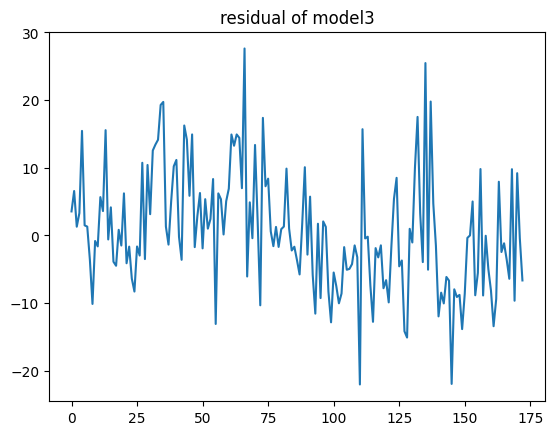

In [ ]:
vote_data = wooldridge.data("vote1")
vote_data = vote_data.dropna()
vote_data['lnexpendA'] = np.log(vote_data['expendA'])   
vote_data['lnexpendB'] = np.log(vote_data['expendB'])
xvars = ['prtystrA','lnexpendA','democA','lnexpendB']
model3 = stsapi.OLS(vote_data['voteA'],vote_data[xvars]).fit()
#print(model3.summary())
vote_data['residual'] = model3.resid
model3_residreg = stsapi.OLS(vote_data['residual'],vote_data['prtystrA']).fit()
print(model3_residreg.summary())

#the R-squared is 0.000, which means the prtystrA has no explanatory power for the residual of model3 (original model)
#the endogeneity problem is not obvious in the model3

print(model3.resid) 
model3.resid.plot(title = "residual of model3")


#### (b)

In [ ]:
import statsmodels.stats.diagnostic as diag
import statsmodels.formula.api as smf
def breusch_pagan_test(data,xvars):
    data['residuals2'] = data['residual']**2
    pattern = 'residuals2 ~ ' + ' + '.join(xvars)
    model = smf.ols(pattern,data).fit()
    return model.fvalue,model.f_pvalue
f_value,f_pvalue = breusch_pagan_test(vote_data,xvars)
print("F value:",f_value,"F p value:",f_pvalue)

#the null hypothesis is that the variance of the error term is constant
#the p values is 0.02 which is smaller than 0.05, so we reject the null hypothesis
#so the homoskedasticity assumption is violated

F value: 2.969102414620341 F p value: 0.0210926323488667


#### (c)

In [ ]:
xvars

['prtystrA', 'lnexpendA', 'democA', 'lnexpendB']

In [ ]:
import patsy as pt
import statsmodels.stats.diagnostic as diag
y,X = pt.dmatrices('voteA ~ prtystrA + lnexpendA + democA + lnexpendB',vote_data)
white_result = diag.het_white(model3.resid,X)
print("LM test:",white_result[0],"\n","LM p value:",white_result[1],"\n","F value:",white_result[2],"\n","F p value:",white_result[3])

#the p value of LM test is 0.000 which is smaller than 0.05, so we reject the null hypothesis
#the p value of F test is 0.000 which is smaller than 0.05, so we reject the null hypothesis
#so the heteroskedasticity exists in the model3


LM test: 58.46802439442288 
 LM p value: 9.855265129568929e-08 
 F value: 6.24374904882327 
 F p value: 2.0769736336387563e-09


#### (d)

In [ ]:
xvars

['prtystrA', 'lnexpendA', 'democA', 'lnexpendB']

robust standard error model:                                  OLS Regression Results                                
Dep. Variable:                  voteA   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1956.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                   2.50e-140
Time:                        20:41:04   Log-Likelihood:                         -620.83
No. Observations:                 173   AIC:                                      1250.
Df Residuals:                     169   BIC:                                      1262.
Df Model:                           4                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
------------

In [ ]:
robust_standard_error_model = stsapi.OLS(vote_data['voteA'],vote_data[xvars]).fit(cov_type='HC0')
print("robust standard error model:",robust_standard_error_model.summary())

expresid = smf.ols('np.log(residuals2) ~ prtystrA + lnexpendA + democA + lnexpendB',vote_data).fit()
w = 1/(np.exp(expresid.fittedvalues))
fgls_model = smf.wls('voteA ~ prtystrA + lnexpendA + democA + lnexpendB',vote_data,weights = w).fit()
print("fgls_model:",fgls_model.summary())

#the robust standard error model and the FGLS model both have
#larger standard error than the original model3

#the robust standard error model and the FGLS model are both
#significant at 5% level and at 1% level for most of the variables
#and are better than the original model3


#only the coefficient of democA of FGLS is not significant at 1% level
#the R-squared of the robust standard error model is 0.999, which is greater than the R-squared of the FGLS model
#both models are better than the original model3 



robust standard error model:                                  OLS Regression Results                                
Dep. Variable:                  voteA   R-squared (uncentered):                   0.973
Model:                            OLS   Adj. R-squared (uncentered):              0.972
Method:                 Least Squares   F-statistic:                              1956.
Date:                Mon, 20 Nov 2023   Prob (F-statistic):                   2.50e-140
Time:                        20:44:31   Log-Likelihood:                         -620.83
No. Observations:                 173   AIC:                                      1250.
Df Residuals:                     169   BIC:                                      1262.
Df Model:                           4                                                  
Covariance Type:                  HC0                                                  
                 coef    std err          z      P>|z|      [0.025      0.975]
------------

### Q3

A data.frame with 7150 observations on 30 variables:

durat: duration of benefits

afchnge: =1 if after change in benefits

highearn: =1 if high earner

male: =1 if male

married: =1 if married

hosp: =1 if inj. required hosp. stay

indust: industry

injtype: type of injury

age: age at time of injury

prewage: previous weekly wage, 1982 $

totmed: total med. costs, 1982 $

injdes: 4 digit injury description

benefit: real dollar value of benefit

ky: =1 for kentucky

mi: =1 for michigan

ldurat: log(durat)

afhigh: afchnge*highearn

lprewage: log(wage)

lage: log(age)

ltotmed: log(totmed); = 0 if totmed < 1

head: =1 if head injury

neck: =1 if neck injury

upextr: =1 if upper extremities injury

trunk: =1 if trunk injury

lowback: =1 if lower back injury

lowextr: =1 if lower extremities injury

occdis: =1 if occupational disease

manuf: =1 if manufacturing industry

construc: =1 if construction industry

highlpre: highearn*lprewage

#### (a)

In [17]:
injury_data = wooldridge.data("injury")
injury_data = injury_data.dropna()
print(injury_data.columns)
#control and treatment group: highearn
contro_vars = ['male','married','age','injtype']
x_vars  = contro_vars + ['highearn']

treat_model= stsapi.OLS(np.log(injury_data['durat']),injury_data[x_vars]).fit()
print(treat_model.summary())

#highearn is significant at 5% level and at 1% level
#highearn has a positive effect on the log duration of injury

#The coefficient of highearn 0.1997 means that the expected log(durat) is 0.1997 higher for high-income workers, holding other controls unchanged,
#which in this case is the treatment effect.

Index(['durat', 'afchnge', 'highearn', 'male', 'married', 'hosp', 'indust',
       'injtype', 'age', 'prewage', 'totmed', 'injdes', 'benefit', 'ky', 'mi',
       'ldurat', 'afhigh', 'lprewage', 'lage', 'ltotmed', 'head', 'neck',
       'upextr', 'trunk', 'lowback', 'lowextr', 'occdis', 'manuf', 'construc',
       'highlpre'],
      dtype='object')
                                 OLS Regression Results                                
Dep. Variable:                  durat   R-squared (uncentered):                   0.516
Model:                            OLS   Adj. R-squared (uncentered):              0.516
Method:                 Least Squares   F-statistic:                              1455.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):                        0.00
Time:                        20:55:22   Log-Likelihood:                         -11446.
No. Observations:                6822   AIC:                                  2.290e+04
Df Residuals:                    6

#### (b)

In [ ]:
random_group_model = stsapi.OLS(injury_data['highearn'],injury_data[contro_vars]).fit()
print(random_group_model.summary())
print("\n")
print("F value:",random_group_model.fvalue,"F p value:",random_group_model.f_pvalue)


#the F test is significant at 1% level which means the null hypothesis of all betas being zero is rejected
#the treatment group is not randomly assigned and highly correlated with the control variables

                                 OLS Regression Results                                
Dep. Variable:               highearn   R-squared (uncentered):                   0.506
Model:                            OLS   Adj. R-squared (uncentered):              0.506
Method:                 Least Squares   F-statistic:                              1748.
Date:                Tue, 21 Nov 2023   Prob (F-statistic):                        0.00
Time:                        11:07:52   Log-Likelihood:                         -4082.5
No. Observations:                6822   AIC:                                      8173.
Df Residuals:                    6818   BIC:                                      8200.
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

#### (c)

                            OLS Regression Results                            
Dep. Variable:                  durat   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     14.65
Date:                Tue, 21 Nov 2023   Prob (F-statistic):           4.60e-19
Time:                        20:58:04   Log-Likelihood:                -31244.
No. Observations:                6822   AIC:                         6.250e+04
Df Residuals:                    6814   BIC:                         6.256e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept           

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


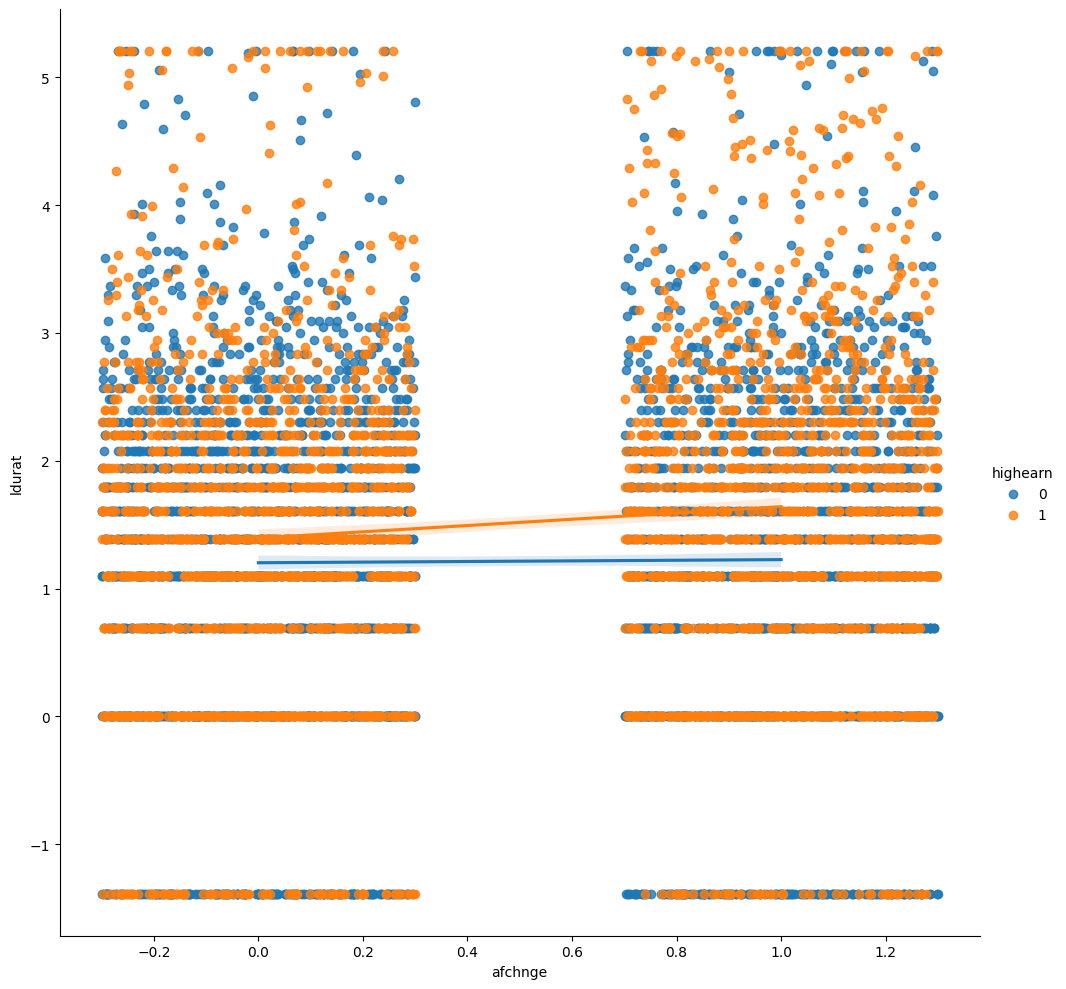

In [19]:


def difference_in_differences(data, treatment_var, time_var, outcome_var):
    # Create dummy variables for treatment and time periods
    data['treatment_dummy'] = data[treatment_var]
    data['post_dummy'] = data[time_var]
    
    # Create interaction term between treatment and post
    data['treatment_post_interaction'] = data['treatment_dummy'] * data['post_dummy']
    
    # Specify the model formula
    formula = f'{outcome_var} ~ treatment_dummy + post_dummy + treatment_post_interaction +' + ' + '.join(contro_vars) 
    # Fit the OLS model
    model = stsapi.OLS.from_formula(formula, data=data)
    results = model.fit()
    
    return results

result = difference_in_differences(injury_data, 'highearn', 'afchnge', 'durat')
print(result.summary())
    # Usage example:
#results = difference_in_differences(data, 'treatment', 'time', 'outcome')
#print(results.summary())

#the coefficient of treatment_post_interaction is  not  significant at 5% level
#the impact of treatment on the outcome is not significant at 5% level
#the treatment effect is 2.1731 which is not significant at 5% level

sns.lmplot(x = "afchnge", y = "ldurat",
hue = "highearn",
data = injury_data,
height = 10, x_jitter = .3)

### Q4

#### (a)

In [7]:
import statsmodels.formula.api as smf
loan_data = wooldridge.data("loanapp")
loan_data = loan_data.dropna()


reg_linear_model = smf.ols('approve ~ white', data = loan_data).fit()
print('linear model:',reg_linear_model.summary())
#for the linear model:
#the coefficient of white is 0.2133
#white has 0.2133 higher probability of being approved than non-white

loan_data['predicted1'] = reg_linear_model.predict()

print("no white:",loan_data[loan_data['white'] == 0]\
      ['predicted1'].mean())
print("white: ",loan_data[loan_data['white'] == 1]\
      ['predicted1'].mean())
#the average predicted probability of being approved for non-white is 0.695
#the average predicted probability of being approved for white is 0.908



reg_probit_model = smf.probit('approve ~ white', data = loan_data).fit()
print('probit model:',reg_probit_model.summary())
#for the probit model:
#the coefficiento of white is 0.8208


loan_data['predicted2'] = reg_probit_model.predict()

print("no white:",loan_data[loan_data['white'] == 0]\
      ['predicted2'].mean())
print("white: ",loan_data[loan_data['white'] == 1]\
      ['predicted2'].mean())
#the average predicted probability of being approved for non-white is 0.695
#the average predicted probability of being approved for white is 0.908


#the estimated probability of probit model is not quite different from the linear model
#the coefficient of white varies a lot

linear model:                             OLS Regression Results                            
Dep. Variable:                approve   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.056
Method:                 Least Squares   F-statistic:                     106.3
Date:                Thu, 30 Nov 2023   Prob (F-statistic):           2.98e-24
Time:                        11:35:25   Log-Likelihood:                -513.21
No. Observations:                1778   AIC:                             1030.
Df Residuals:                    1776   BIC:                             1041.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.6952      0.019     3

#### (b)

In [3]:
list = 'hrat, obrat, loanprc, unem, male, married, dep, sch, cosign, chist, pubrec, mortlat1, mortlat2, vr'.split(', ')
formula = 'approve ~ ' + ' + white + ' + " + ".join(list)
formula

'approve ~  + white + hrat + obrat + loanprc + unem + male + married + dep + sch + cosign + chist + pubrec + mortlat1 + mortlat2 + vr'

In [4]:
reg_probit_model2 = smf.probit(formula, data = loan_data).fit()
print("probit model2:",reg_probit_model2.summary())
#reg_probit_model2.summary()
#the coefficient of white is 0.5733
#the coefficient of is significant at 5% level and at 1% level
#most of the control variables has significant effect on the probability of being approved
#the result indicates that the white has 0.5733 higher probability of being approved than non-white
#prooving the racial difference in the loan approval process



Optimization terminated successfully.
         Current function value: 0.307841
         Iterations 6
probit model2:                           Probit Regression Results                           
Dep. Variable:                approve   No. Observations:                 1778
Model:                         Probit   Df Residuals:                     1762
Method:                           MLE   Df Model:                           15
Date:                Thu, 30 Nov 2023   Pseudo R-squ.:                  0.1894
Time:                        11:31:21   Log-Likelihood:                -547.34
converged:                       True   LL-Null:                       -675.23
Covariance Type:            nonrobust   LLR p-value:                 8.012e-46
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0153      0.321      6.281      0.000       1.386       2.644
white         

#### (c)

In [49]:
reg_logit_model1 = smf.logit(formula, data = loan_data).fit()
print("logit model1:",reg_logit_model1.summary())
print("coefficient of white in logit model1:",reg_logit_model1.params[1])
print("coefficient of white in probit model2:",reg_probit_model2.params[1])
#logit has higher coefficient of white than probit

Optimization terminated successfully.
         Current function value: 0.307763
         Iterations 7
logit model1:                            Logit Regression Results                           
Dep. Variable:                approve   No. Observations:                 1778
Model:                          Logit   Df Residuals:                     1762
Method:                           MLE   Df Model:                           15
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                  0.1896
Time:                        21:42:21   Log-Likelihood:                -547.20
converged:                       True   LL-Null:                       -675.23
Covariance Type:            nonrobust   LLR p-value:                 7.024e-46
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.7243      0.607      6.134      0.000       2.534       4.914
white          

#### (d)

In [54]:
####
##the average marginal efect of probit and logit
print("average marginal effect of probit model2:")
print(reg_probit_model2.get_margeff(at = 'mean').summary())
print("average marginal effect of logit model1:")
print(reg_logit_model1.get_margeff(at = 'mean').summary())
print("average marginal effect of white of probit model:",reg_probit_model2.get_margeff(at = 'mean').summary().tables[1][1][1])
print("average marginal effect of white of logit model:",reg_logit_model1.get_margeff(at = 'mean').summary().tables[1][1][1])
#the average marginal effect of of white of probit and logit are similar
#the average marginal effect of other variables of probit and logit do not vary too much as well

average marginal effect of probit model2:
       Probit Marginal Effects       
Dep. Variable:                approve
Method:                          dydx
At:                              mean
                dy/dx    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
white          0.0945      0.017      5.719      0.000       0.062       0.127
hrat           0.0008      0.001      0.696      0.486      -0.001       0.003
obrat         -0.0043      0.001     -4.211      0.000      -0.006      -0.002
loanprc       -0.1574      0.039     -4.013      0.000      -0.234      -0.081
unem          -0.0070      0.003     -2.366      0.018      -0.013      -0.001
male          -0.0008      0.019     -0.042      0.966      -0.037       0.036
married        0.0479      0.016      3.001      0.003       0.017       0.079
dep           -0.0052      0.007     -0.772      0.440      -0.018       0.008
sch           -0